# **TUGAS DATA MINING (DATA DECISION TREE)**

**# ARLIN MARSYANDA**

**# 41101024001**



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Pilih Dataset**
> Memilih dataset yaitu Drug 2020

In [5]:
!pip install pandas
import pandas as pd
# Memuat data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')
# Menampilkan 5 baris pertama dari dataset
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Pastikan bahwa dataset yang dipilih memiliki fitur-fitur yang relevan serta memiliki variabel target yang akan diprediksi

> **a. Fitur yang Relevan:**
> Dataset ini kemungkinan besar memiliki fitur-fitur yang relevan seperti:
- Age: Sebagai usia pasien.
- Sex: Sebagai jenis kelamin pasien.
- BP: Sebagai tekanan darah pasien (misalnya: HIGH, LOW, NORMAL).
- Cholesterol: Sebagai kadar kolesterol pasien (misalnya: HIGH, NORMAL).
- Na_to_K: Sebagai rasio natrium terhadap kalium dalam darah pasien.

> **b. Variabel Target:**
Variabel target yang ingin diprediksi kemungkinan adalah:
- Drug: Sebagai jenis obat yang diresepkan kepada pasien, yaitu DrugA, DrugB, DrugC, DrugX, DrugY

# **2.	Pra-proses Data dan Eksplorasi**

- **PRA-PROSES DATA**

**A. Melakukan Pengecekan Missing Value**

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


**B. Menampilkan Informasi Data**

> Non-null count digunakan untuk menunjukkan jumlah nilai yang tidak kosong atau tidak hilang (missing) pada setiap kolom dalam dataset.

- Tidak ada nilai yang hilang (missing values) dalam dataset. Setiap kolom memiliki 200 nilai yang valid dan terisi.
- Setelah dataset lengkap maka dapat melanjutkan ke tahap analisis data untuk dianalisis.

In [7]:
# Menampilkan Informasi Data
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


**C. Melakukan Transformasi Variabel Kategorik dan Normalisasi fitur**

- Transformasi dilakukan untuk mengonversi variabel kategorik dalam dataset menjadi bentuk numerik dengan bantuan LabelEncoder.

- Fitur disimpan menggunakan dictionary mappings, yang menyimpan informasi pemetaan antara nilai asli dan nilai numerik baru untuk setiap variabel kategorik.

- Kategori-kategori tersebut diubah menjadi representasi numerik seperti 0, 1, 2, dan seterusnya.

- Normalisasi sangat penting dalam machine learning karena beberapa algoritma peka terhadap skala data. Jika fitur-fitur memiliki rentang nilai yang sangat berbeda, maka fitur dengan rentang yang lebih besar bisa mendominasi proses pembelajaran model.

- inMaxScaler adalah salah satu metode normalisasi yang menskalakan data ke dalam rentang antara 0 dan 1.

In [8]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- Transformasi Variabel Kategorik ---
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengubah variabel kategorik menjadi numerik dan menyimpan mapping
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
mappings = {}
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# --- Normalisasi Fitur ---
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik (Age dan Na_to_K)
numerical_features = ['Age', 'Na_to_K']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Menampilkan data yang telah ditransformasi
print("\nData yang telah ditransformasi:")
print(df.head())

# --- Mencetak Keterangan ---
print("Keterangan Kolom:")
for feature in categorical_features:
    print(f"\n{feature}:")
    for label, value in mappings[feature].items():
        print(f"  {value} : {label}")


Data yang telah ditransformasi:
        Age  Sex  BP  Cholesterol   Na_to_K  Drug
0  0.135593    0   0            0  0.596848     4
1  0.542373    1   1            0  0.213397     2
2  0.542373    1   1            0  0.120239     2
3  0.220339    0   2            0  0.047814     3
4  0.779661    0   1            0  0.368191     4
Keterangan Kolom:

Sex:
  0 : F
  1 : M

BP:
  0 : HIGH
  1 : LOW
  2 : NORMAL

Cholesterol:
  0 : HIGH
  1 : NORMAL

Drug:
  0 : drugA
  1 : drugB
  2 : drugC
  3 : drugX
  4 : drugY


- **EXPLORATORY DATA ANALYSIS**

**1. Statistik Deskriptif**

Nilai NaN muncul karena fungsi df.describe(include='all') mencoba menghitung statistik deskriptif untuk setiap kolom, baik kategorikal maupun numerik.

Beberapa statistik hanya berlaku untuk tipe data tertentu. Jika statistik tersebut tidak relevan untuk tipe data tertentu, hasilnya akan berupa NaN.

In [9]:
# --- Statistik Deskriptif ---
print("Statistik Deskriptif Dataset:")
print(df.describe(include='all'))  # Menampilkan statistik untuk semua kolom

Statistik Deskriptif Dataset:
              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean     0.496864    0.520000    0.910000     0.485000    0.306945    2.870000
std      0.280412    0.500854    0.821752     0.501029    0.225904    1.372047
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.271186    0.000000    0.000000     0.000000    0.130605    2.000000
50%      0.508475    1.000000    1.000000     0.000000    0.239774    3.000000
75%      0.728814    1.000000    2.000000     1.000000    0.410001    4.000000
max      1.000000    1.000000    2.000000     1.000000    1.000000    4.000000


Untuk menghilangkan NaN pada statistik deskriptif, pisahkan kolom numerik dan kategorik atau lakukan analisis statistik deskriptif secara terpisah:

- Statistik Deskriptif Kolom Numerik: Tabel ini akan berisi statistik yang sesuai untuk data numerik (seperti mean, std, min, max, dll.) tanpa adanya nilai NaN.
- Statistik Deskriptif Kolom Kategorik: Tabel ini akan berisi statistik yang sesuai untuk data kategorik (seperti count, unique, top, freq) juga tanpa nilai NaN.

In [10]:
# --- Pisahkan Kolom Numerik dan Kategorik ---
numerical_features = ['Age', 'Na_to_K']
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']

df_numerical = df[numerical_features]
df_categorical = df[categorical_features]

# --- Statistik Deskriptif ---
print("Statistik Deskriptif Kolom Numerik:")
print(df_numerical.describe())  # Statistik untuk kolom numerik

print("\nStatistik Deskriptif Kolom Kategorik:")
print(df_categorical.describe(include='all'))  # Statistik untuk kolom kategorik

Statistik Deskriptif Kolom Numerik:
              Age     Na_to_K
count  200.000000  200.000000
mean     0.496864    0.306945
std      0.280412    0.225904
min      0.000000    0.000000
25%      0.271186    0.130605
50%      0.508475    0.239774
75%      0.728814    0.410001
max      1.000000    1.000000

Statistik Deskriptif Kolom Kategorik:
              Sex          BP  Cholesterol        Drug
count  200.000000  200.000000   200.000000  200.000000
mean     0.520000    0.910000     0.485000    2.870000
std      0.500854    0.821752     0.501029    1.372047
min      0.000000    0.000000     0.000000    0.000000
25%      0.000000    0.000000     0.000000    2.000000
50%      1.000000    1.000000     0.000000    3.000000
75%      1.000000    2.000000     1.000000    4.000000
max      1.000000    2.000000     1.000000    4.000000


Statistik deskriptif setelah transformasi, terutama setelah normalisasi fitur numerik dan transformasi variabel kategorik menggunakan LabelEncoder:

- **Interpretasi**: Saat menginterpretasikan statistik deskriptif pasca-transformasi, penting untuk mempertimbangkan jenis transformasi yang diterapkan. Misalnya, nilai rata-rata untuk kolom 'Age' setelah normalisasi tidak lagi menunjukkan usia rata-rata dalam satuan tahun, tetapi rata-rata dalam skala 0 hingga 1.
  
- **Konteks**: Statistik deskriptif harus selalu ditafsirkan dalam konteks data serta transformasi yang dilakukan.

In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- Transformasi Variabel Kategorik ---
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengubah variabel kategorik menjadi numerik dan menyimpan mapping
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
mappings = {}
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])
    mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# --- Normalisasi Fitur ---
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik (Age dan Na_to_K)
numerical_features = ['Age', 'Na_to_K']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# --- Statistik Deskriptif Setelah Transformasi ---
print("Statistik Deskriptif Setelah Transformasi:")
print(df.describe(include='all'))  # Menampilkan statistik untuk semua kolom




Statistik Deskriptif Setelah Transformasi:
              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean     0.496864    0.520000    0.910000     0.485000    0.306945    2.870000
std      0.280412    0.500854    0.821752     0.501029    0.225904    1.372047
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%      0.271186    0.000000    0.000000     0.000000    0.130605    2.000000
50%      0.508475    1.000000    1.000000     0.000000    0.239774    3.000000
75%      0.728814    1.000000    2.000000     1.000000    0.410001    4.000000
max      1.000000    1.000000    2.000000     1.000000    1.000000    4.000000


Berikut adalah cara untuk menampilkan hubungan antara *BP*, *Sex*, dan *Cholesterol* terhadap *Drug* sebelum dan sesudah transformasi:

- **Tabel Kontingensi Terpisah**: Buat tabel kontingensi untuk masing-masing variabel kategorik (*BP*, *Sex*, dan *Cholesterol*) terhadap *Drug*. Setiap tabel akan menampilkan distribusi antara variabel tersebut dan *Drug*, sehingga hubungan antara variabel individual dan *Drug* dapat diamati secara terpisah.
  
- **Tabel Kontingensi Gabungan**: Gabungkan semua variabel kategorik (*BP*, *Sex*, dan *Cholesterol*) dalam satu tabel kontingensi untuk melihat hubungan kolektifnya terhadap *Drug*. Tabel ini akan memperlihatkan distribusi kombinasi dari ketiga variabel tersebut dalam kaitannya dengan *Drug*, memungkinkan analisis hubungan yang lebih kompleks di antara variabel-variabel tersebut.

In [12]:
# a. Hubungan antara variabel kategorik dan variabel target

# --- Membuat tabel kontingensi sebelum transformasi ---
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')
drug_counts_original = pd.crosstab(df_original['BP'], df_original['Drug'])
print("\nHubungan antara BP dan Drug (sebelum transformasi):")
print(drug_counts_original)

drug_counts_original = pd.crosstab(df_original['Sex'], df_original['Drug'])
print("\nHubungan antara Sex dan Drug (sebelum transformasi):")
print(drug_counts_original)

drug_counts_original = pd.crosstab(df_original['Cholesterol'], df_original['Drug'])
print("\nHubungan antara Cholesterol dan Drug (sebelum transformasi):")
print(drug_counts_original)


# --- Membuat tabel kontingensi setelah transformasi ---
drug_counts_transformed = pd.crosstab(df['BP'], df['Drug'])
print("\nHubungan antara BP dan Drug (setelah transformasi):")
print(drug_counts_transformed)

drug_counts_transformed = pd.crosstab(df['Sex'], df['Drug'])
print("\nHubungan antara Sex dan Drug (setelah transformasi):")
print(drug_counts_transformed)

drug_counts_transformed = pd.crosstab(df['Cholesterol'], df['Drug'])
print("\nHubungan antara Cholesterol dan Drug (setelah transformasi):")
print(drug_counts_transformed)

# b. --- Menggunakan Crosstab ---
# Hubungan antara variabel kategorik dan variabel target (menggunakan crosstab)
for feature in categorical_features[:-1]:  # Exclude 'Drug' (target)
    drug_counts = pd.crosstab(df[feature], df['Drug'])
    print(f"\nHubungan antara {feature} dan Drug:")
    print(drug_counts)




Hubungan antara BP dan Drug (sebelum transformasi):
Drug    drugA  drugB  drugC  drugX  drugY
BP                                       
HIGH       23     16      0      0     38
LOW         0      0     16     18     30
NORMAL      0      0      0     36     23

Hubungan antara Sex dan Drug (sebelum transformasi):
Drug  drugA  drugB  drugC  drugX  drugY
Sex                                    
F         9      6      7     27     47
M        14     10      9     27     44

Hubungan antara Cholesterol dan Drug (sebelum transformasi):
Drug         drugA  drugB  drugC  drugX  drugY
Cholesterol                                   
HIGH            12      8     16     20     47
NORMAL          11      8      0     34     44

Hubungan antara BP dan Drug (setelah transformasi):
Drug   0   1   2   3   4
BP                      
0     23  16   0   0  38
1      0   0  16  18  30
2      0   0   0  36  23

Hubungan antara Sex dan Drug (setelah transformasi):
Drug   0   1  2   3   4
Sex              

**2. Visualisasi Distribusi Data dengan Histogram dan Boxplot untuk Fitur Numerik dan Count untuk Fitur Kategorik**

1. **Histogram dan Boxplot**:
   - Histogram digunakan untuk melihat distribusi data secara kontinu, sehingga bentuk distribusi dari suatu variabel dapat diamati dengan lebih jelas. Sebaliknya, boxplot lebih berguna untuk menampilkan ringkasan statistik seperti median dan rentang antar kuartil, serta untuk mendeteksi pencilan atau outlier.

2. **Scatter Plot untuk Hubungan Antar Fitur Numerik**:
   - Scatter plot membantu mengidentifikasi pola atau hubungan antara dua variabel numerik. Jika titik-titik data tersebar merata tanpa pola yang jelas, hal ini menunjukkan tidak adanya korelasi linear yang kuat. Misalnya, distribusi titik yang acak antara variabel *Age* dan rasio *Na_to_K* menunjukkan bahwa usia mungkin tidak memiliki pengaruh signifikan terhadap nilai rasio *Na_to_K*.

3. **Heatmap untuk Korelasi Antar Variabel**:
   - Heatmap digunakan untuk menampilkan matriks korelasi antar variabel, dengan hasil berikut:
     - Kolom *Sex* dan *Age* tidak memiliki korelasi yang signifikan dengan variabel lainnya.
     - *BP* menunjukkan korelasi positif moderat dengan *Drug* (nilai korelasi 0.37).
     - *Na_to_K* memiliki korelasi positif cukup kuat dengan *Drug* (nilai korelasi 0.59), yang mungkin mengindikasikan bahwa rasio natrium terhadap kalium memengaruhi variabel *Drug*.

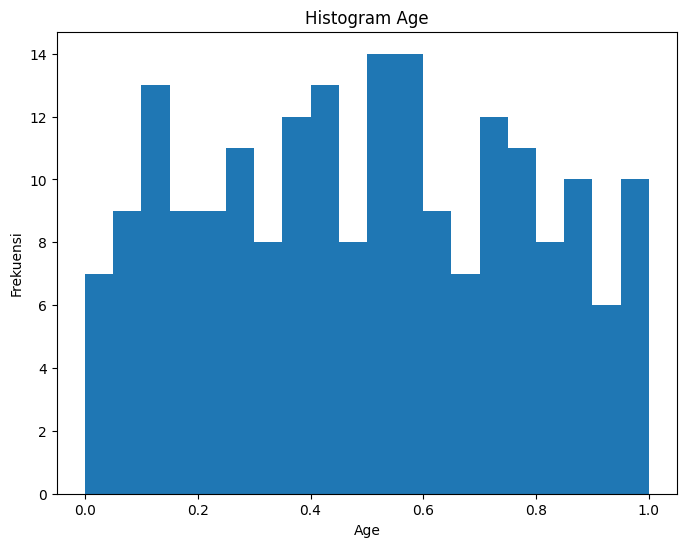

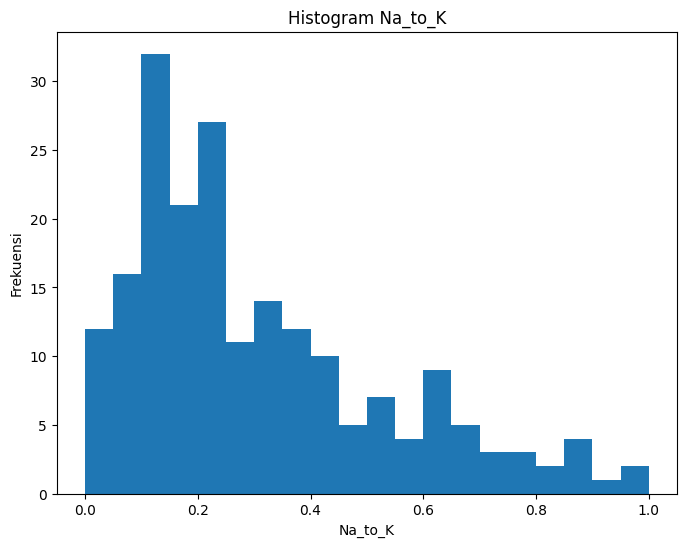

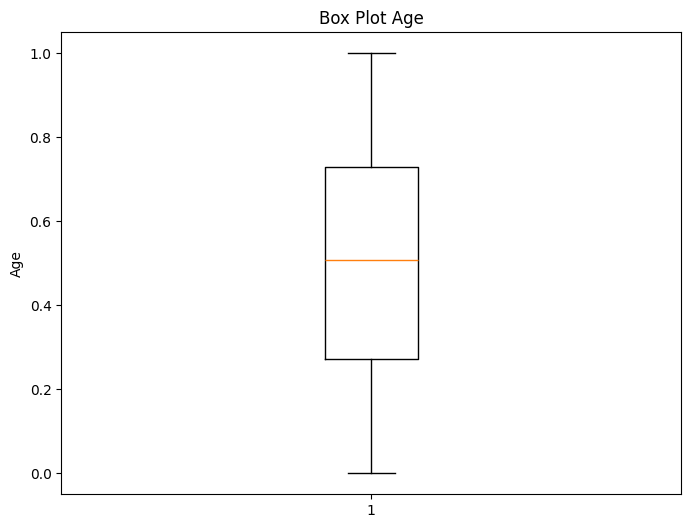

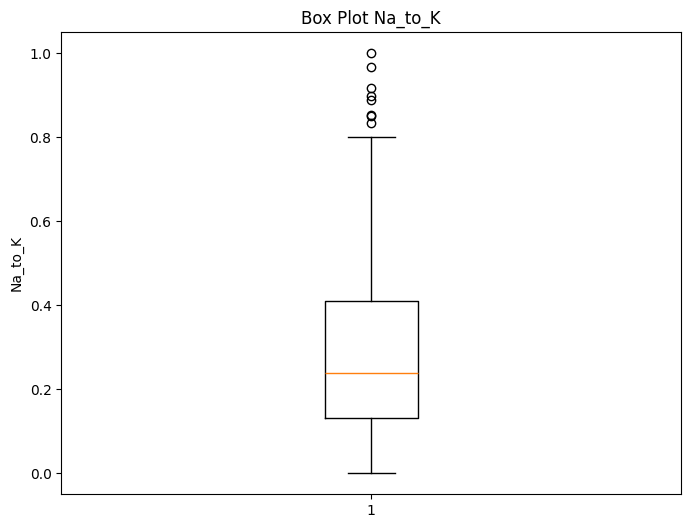

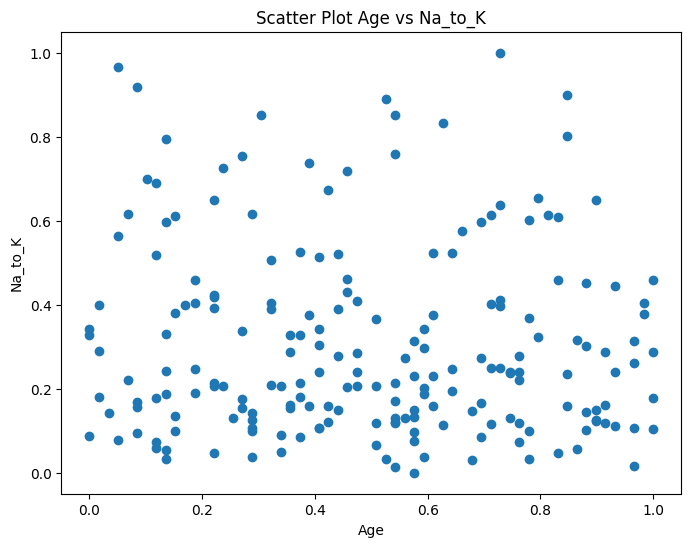

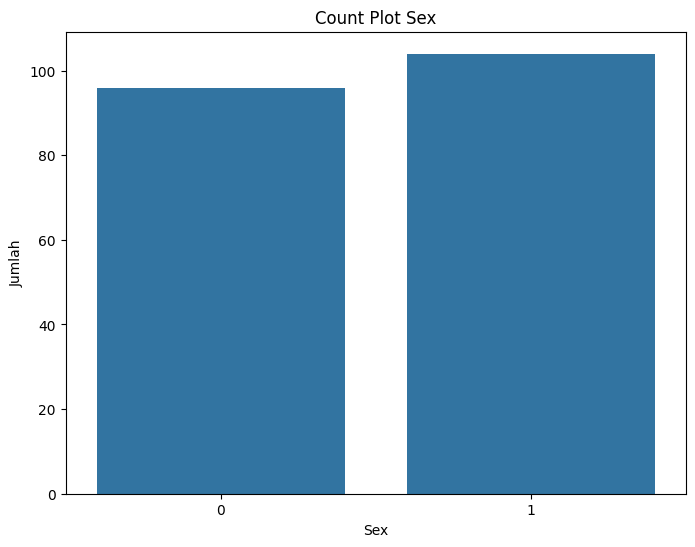

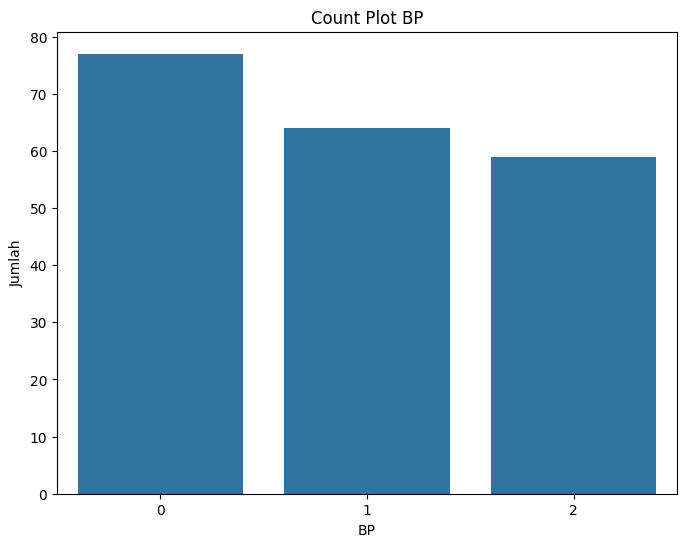

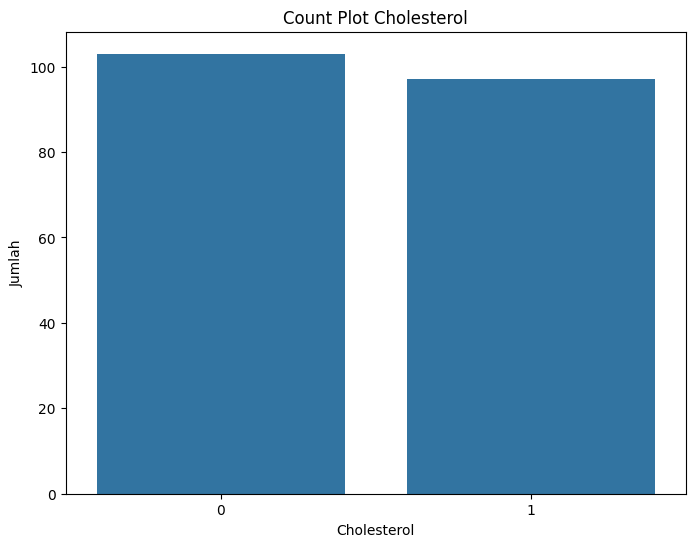

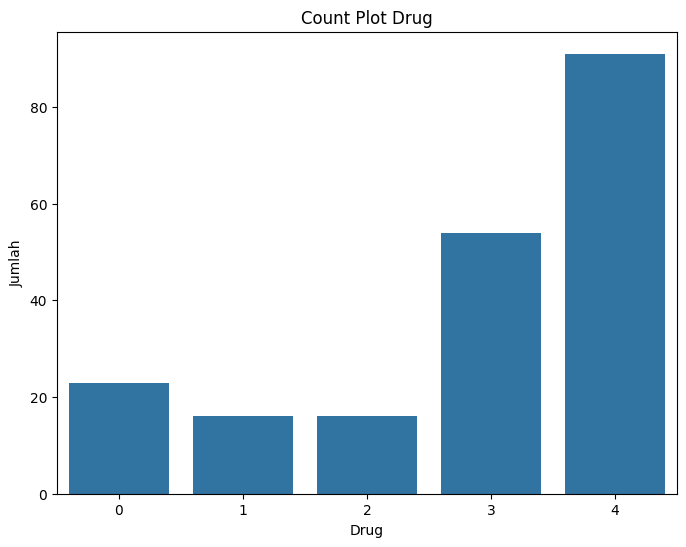

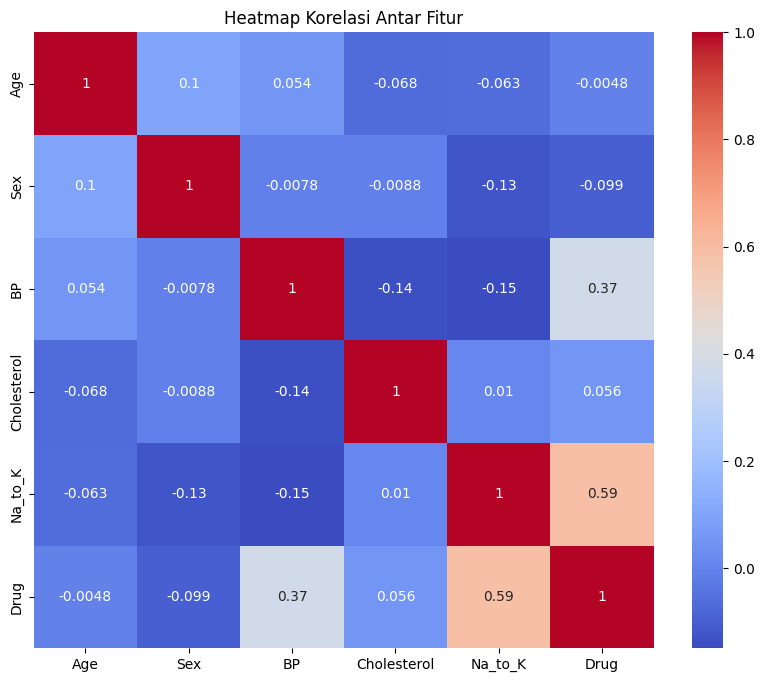

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- Visualisasi Data ---

# 1. Histogram untuk Fitur Numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20)
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

# 2. Box Plot untuk Fitur Numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.title(f'Box Plot {feature}')
    plt.ylabel(feature)
    plt.show()

# 3. Scatter Plot untuk Hubungan Antar Fitur Numerik
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Na_to_K'])
plt.title('Scatter Plot Age vs Na_to_K')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

# 4. Count Plot untuk Fitur Kategorik
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Count Plot {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.show()

# 5. Heatmap untuk Korelasi Antar Fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

**3. EDA lebih lanjut**

- Hubungan yang paling signifikan dalam dataset adalah antara rasio natrium terhadap kalium dalam darah (*Na_to_K*) dan jenis obat yang diresepkan (*Drug*).
- Usia pasien (*Age*) tidak memiliki pengaruh signifikan baik terhadap jenis obat yang diresepkan maupun terhadap rasio *Na_to_K*.
- Terdapat korelasi negatif yang sangat lemah antara *Na_to_K* dan usia pasien, yang menunjukkan bahwa kedua variabel ini tidak memiliki hubungan linear yang berarti.

- Angka 0 dalam tabel hubungan antara fitur kategorik dan variabel target menunjukkan bahwa kombinasi tertentu tidak muncul dalam dataset.
- Angka 0 pada tabel kontingensi setelah transformasi tidak selalu berarti tidak ada hubungan antara nilai kategorikal aslinya. Ini karena transformasi yang telah dilakukan, termasuk **mapping Label Encoder**, perlu diperhatikan untuk menginterpretasikan hasil secara akurat.

Fitur: Age
Jumlah outlier: 0
Persentase outlier: 0.00%
Outlier tidak signifikan, tidak perlu ditangani.

Fitur: Na_to_K
Jumlah outlier: 8
Persentase outlier: 4.00%
Outlier tidak signifikan, tidak perlu ditangani.


Korelasi antara variabel numerik dan target:
              Age   Na_to_K      Drug
Age      1.000000 -0.063119 -0.004828
Na_to_K -0.063119  1.000000  0.589120
Drug    -0.004828  0.589120  1.000000


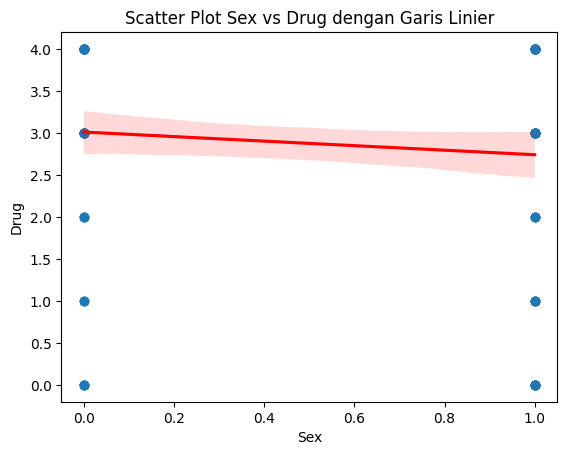

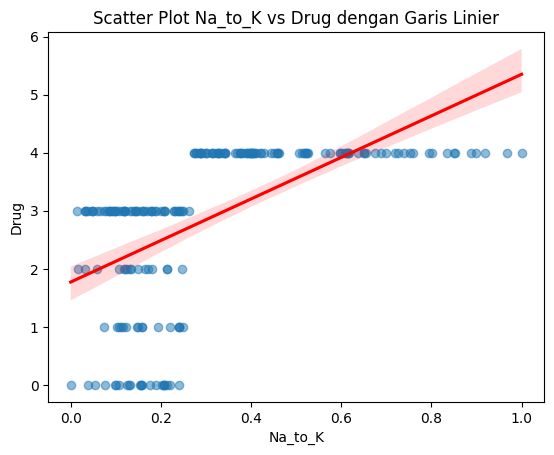


Hubungan antara Sex dan Drug:
Drug   0   1  2   3   4
Sex                    
0      9   6  7  27  47
1     14  10  9  27  44

Hubungan antara BP dan Drug:
Drug   0   1   2   3   4
BP                      
0     23  16   0   0  38
1      0   0  16  18  30
2      0   0   0  36  23

Hubungan antara Cholesterol dan Drug:
Drug          0  1   2   3   4
Cholesterol                   
0            12  8  16  20  47
1            11  8   0  34  44


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#1. Mencari Outlier
    #a. Mencari Outlier (menggunakan IQR)
def find_outliers_IQR(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

for feature in numerical_features:
    outliers = find_outliers_IQR(df, feature)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    print(f"Fitur: {feature}")
    print(f"Jumlah outlier: {num_outliers}")
    print(f"Persentase outlier: {percentage_outliers:.2f}%")

    # b. Menentukan apakah outlier signifikan
    if percentage_outliers > 5:  # Jika persentase outlier > 5%, dianggap signifikan
        print("Outlier signifikan, perlu ditangani.\n")
    else:
        print("Outlier tidak signifikan, tidak perlu ditangani.\n")

# 2. Mencari Pola dan Hubungan Antar Variabel
# a. Korelasi antar variabel numerik
correlation_matrix = df[['Age', 'Na_to_K', 'Drug']].corr()
print("\nKorelasi antara variabel numerik dan target:")
print(correlation_matrix)

# Scatter Plot
sns.regplot(x='Sex', y='Drug', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot Sex vs Drug dengan Garis Linier')
plt.xlabel('Sex')
plt.ylabel('Drug')
plt.show()

sns.regplot(x='Na_to_K', y='Drug', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot Na_to_K vs Drug dengan Garis Linier')
plt.xlabel('Na_to_K')
plt.ylabel('Drug')
plt.show()

# b. Hubungan antara variabel kategorik dan variabel target (menggunakan crosstab)
for feature in categorical_features[:-1]:  # Exclude 'Drug' (target)
    drug_counts = pd.crosstab(df[feature], df['Drug'])
    print(f"\nHubungan antara {feature} dan Drug:")
    print(drug_counts)

Karena pada fitur age dan Na_to_K didapatkan persentase outlier: 0.00% maka dapat disimpulkan outlier tidak signifikan sehingga tidak perlu ditangani

# **3. Pembuatan Model Decision Tree**

- Implementasikan model *Decision Tree* menggunakan pustaka yang tersedia, seperti *scikit-learn* di Python.
- Pilih fitur yang paling relevan untuk membagi data di setiap node.
- Pastikan model dibangun dengan tepat dan sesuai dengan karakteristik dataset yang digunakan.


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Impor OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Pembuatan Model Decision Tree
# Pembuatan Model dan Pencarian Hyperparameter Terbaik

# a. Bagi data menjadi set pelatihan dan pengujian
# Use the processed X instead of redefining it
X = df[['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol']].copy()  # Create a copy to avoid modifying the original
y = df['Drug']

# One-hot encode categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol']
for feature in categorical_features:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output
    encoded_feature = encoder.fit_transform(X[[feature]])
    encoded_df = pd.DataFrame(encoded_feature, columns=[f"{feature}_{cat}" for cat in encoder.categories_[0]])
    X = X.drop(columns=[feature]).join(encoded_df)  # Replace original feature with encoded columns

# Split data after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# b. Tentukan hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 3, 5]  # Experiment with different values
}

# c. Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# d. Gunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # cv=5 untuk 5-fold cross-validation
grid_search.fit(X_train, y_train)

# e. Tampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# f. Gunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# g. Membangun Model
# Instead, use the encoded X from above:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Hyperparameter terbaik: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(random_state=42)

**Hasil yang diperoleh adalah sebagai berikut:**

- **Parameter criterion = 'gini'**: Instruksi ini mengarahkan *Decision Tree* untuk menggunakan Gini impurity sebagai metode pemilihan fitur terbaik dan titik pemisahan di setiap node. Tujuan dari pemilihan ini adalah untuk meminimalkan impurity pada pohon, sehingga menghasilkan klasifikasi yang lebih akurat.

- **max_depth: 5**: Batas kedalaman maksimum *decision tree* ditetapkan hingga 5 level. Pembatasan ini bertujuan untuk mencegah *overfitting*, di mana model menjadi terlalu kompleks dan hanya menghafal data latih, sehingga kurang mampu digeneralisasi ke data baru.

- **max_features: None**: Artinya, semua fitur akan dipertimbangkan saat mencari pemisahan terbaik pada setiap node.

- **min_samples_leaf: 1**: Menunjukkan bahwa jumlah minimum sampel yang harus ada di node akhir (leaf node) adalah 1.

- **min_samples_split: 2**: Menunjukkan bahwa jumlah minimum sampel yang diperlukan untuk membagi node internal adalah 2.

Secara keseluruhan, pengaturan *hyperparameter* ini dirancang untuk menyeimbangkan antara ketepatan dan kompleksitas pohon. Dengan max_depth yang dibatasi hingga 5, model menghindari kedalaman yang berlebihan, sementara nilai kecil untuk min_samples_leaf dan min_samples_split memberikan fleksibilitas dalam pembentukan node akhir.

# **4. Evaluasi Model dan Visualisasi Decision Tree dengan Semua Sub-tree**

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



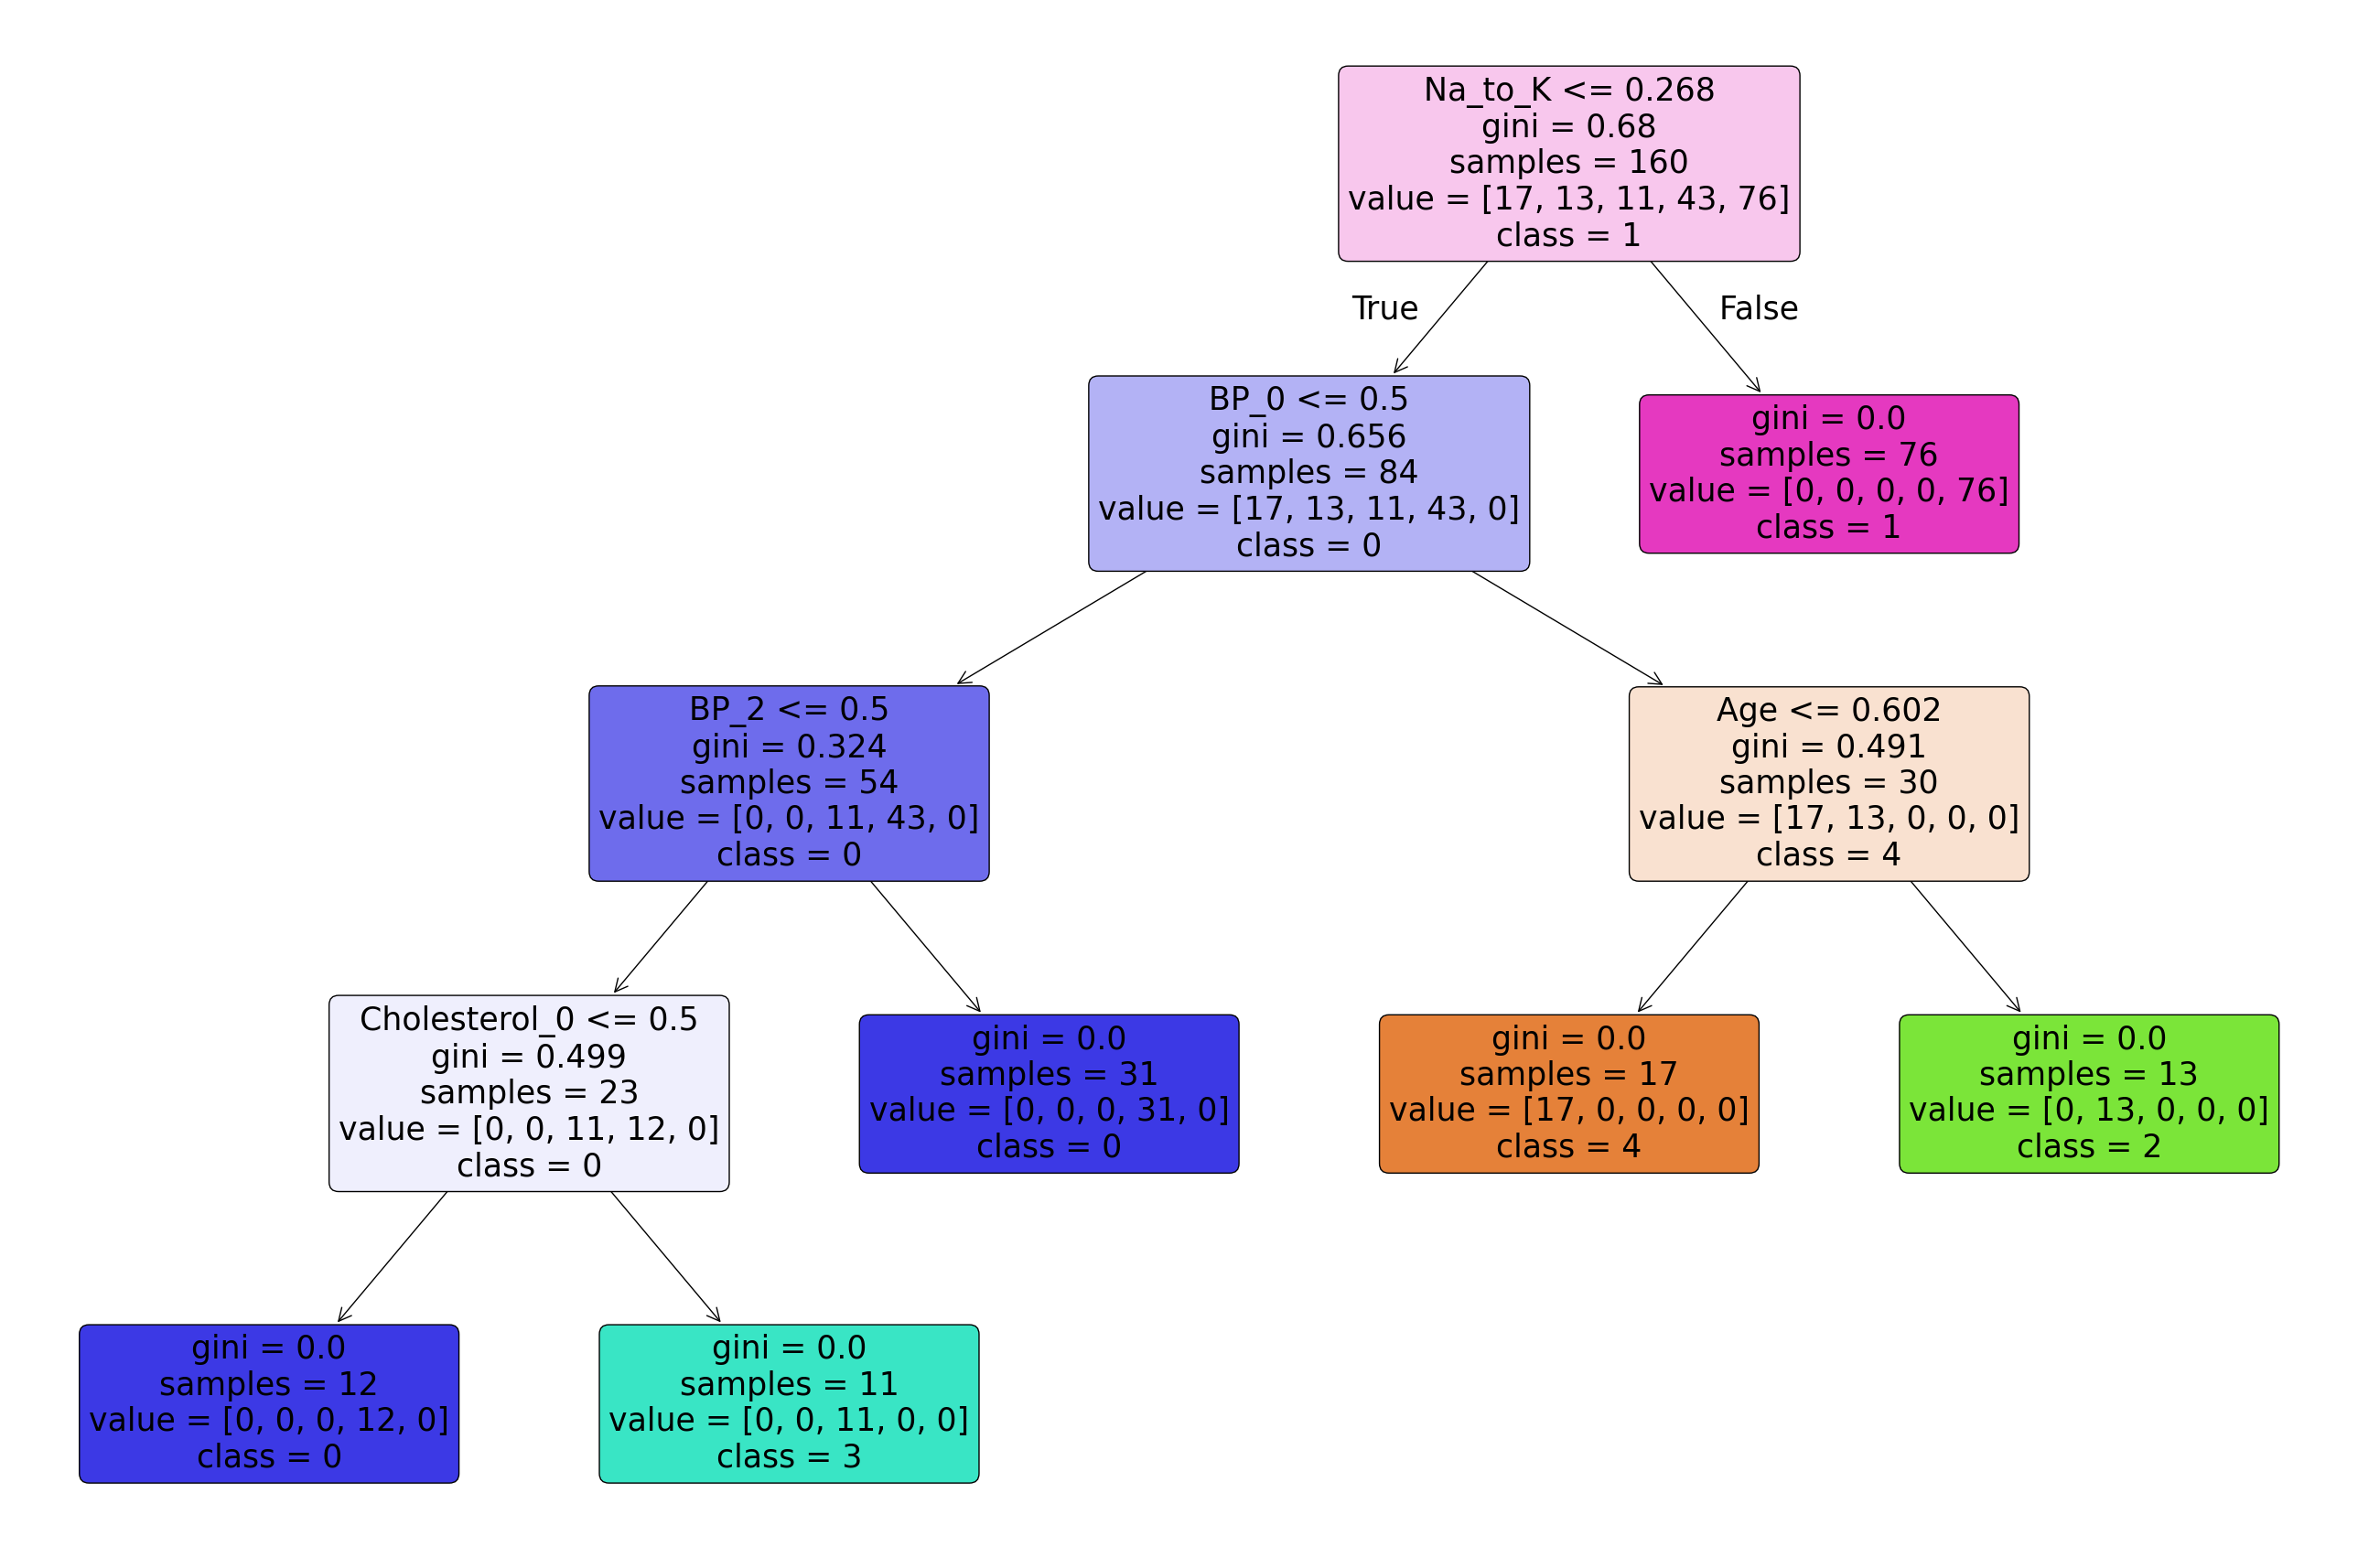

In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score # Import precision_score and recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your trained DecisionTreeClassifier
y_pred = model.predict(X_test) # Predict on the test data

# a. Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Ganti average sesuai kebutuhan
recall = recall_score(y_test, y_pred, average='weighted')  # Ganti average sesuai kebutuhan
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(classification_report(y_test, y_pred))

# b. Visualisasi Decision Tree dengan Semua Sub-tree
plt.figure(figsize=(33, 22))# Ukuran figur yang sangat besar

# c. Use X_train.columns for feature_names after one-hot encoding
plot_tree(model,
          feature_names=X_train.columns,  # Changed to X.columns
          class_names=df['Drug'].unique().astype(str),
          filled=True,
          rounded=True,
          fontsize=25, # Ukuran font diperbesar
          max_depth=5 # Menampilkan semua level pohon hingga kedalaman 9
          # Parameter min_samples_split dan min_samples_leaf dihapus
          # karena tidak berlaku untuk plot_tree.
          # Parameter-parameter ini hanya digunakan saat membangun model (DecisionTreeClassifier).
          )
plt.savefig('decision_tree.png', bbox_inches='tight') # Menyimpan figur sebagai PNG dengan bbox_inches='tight'
plt.show()

**Hasil yang diperoleh adalah sebagai berikut:**

- **Accuracy: 1.0**: Ini menunjukkan bahwa model berhasil memprediksi dengan benar 100% dari data pada set pengujian, artinya tidak ada kesalahan prediksi.

- **Precision: 1.0**: Ini berarti bahwa untuk setiap kelas (0, 1, 2, 3, 4), semua prediksi positif yang dibuat oleh model adalah benar, tanpa adanya *false positive*.

- **Recall: 1.0**: Ini menunjukkan bahwa model berhasil mengidentifikasi semua instance yang sebenarnya positif untuk setiap kelas, tanpa ada *false negative*.

- **F1-score: 1.0**: F1-score adalah rata-rata harmonik dari precision dan recall, yang juga menunjukkan nilai sempurna 1.0 dalam kasus ini, menandakan keseimbangan yang sangat baik antara precision dan recall.

Secara keseluruhan, model ini menunjukkan performa yang sempurna di semua kelas (0, 1, 2, 3, 4) dengan nilai precision, recall, dan f1-score yang semuanya 1.0, yang berarti model ini tidak melakukan kesalahan dalam klasifikasi data.


Walaupun mendapatkan nilai sempurna untuk semua metrik pada set pengujian sangat jarang terjadi, hal ini sering kali menunjukkan adanya *overfitting*. *Overfitting* terjadi ketika model menghafal data latih dengan sangat baik, sehingga dapat memprediksi data latih dengan sempurna. Namun, model seperti ini cenderung kesulitan untuk digeneralisasi pada data baru yang belum pernah dilihat sebelumnya, yang menyebabkan kinerja model pada data pengujian atau data baru bisa menurun.

**INTERPRETASI DECISION TREE**

Secara keseluruhan, pohon keputusan ini efektif dalam membagi data menjadi beberapa node daun, yang sebagian besar memiliki nilai Gini impurity yang rendah (0.0). Hal ini menunjukkan bahwa model berhasil mengklasifikasikan sebagian besar data dengan baik. Fitur-fitur seperti *Na_to_K*, *BP_0*, *BP_2*, *Cholesterol_0*, dan *Age* digunakan untuk membuat keputusan pada setiap tingkat pohon.

Berikut adalah langkah-langkah dan interpretasi lebih lanjut dari pohon keputusan ini:

1. **Root Node** (Node Akar) dengan fitur *Na_to_K*:
   - **Fitur**: *Na_to_K*, **threshold**: *Na_to_K <= 0.268*
   - **Gini Impurity**: 0.68 (menunjukkan adanya keragaman kelas yang besar di awal), jumlah sampel: 160, distribusi kelas: [17, 13, 11, 43, 76]
   - **Prediksi Kelas**: Kelas 1 (karena jumlah sampel terbanyak di node ini)

2. **Cabang Kanan (Na_to_K > 0.268)**:
   - **Node 1 (berwarna ungu)**: Semua sampel adalah kelas *drugB*, dengan Gini impurity 0.0 (tidak ada keragaman kelas).
   - **Jumlah Sampel**: 76, distribusi kelas: [0, 0, 0, 0, 76], **Prediksi Kelas**: *drugB*

3. **Cabang Kiri (Na_to_K <= 0.268)**:
   - **Node 2 (berwarna biru muda)**: Data dipisahkan berdasarkan *BP_0*. Jika *BP_0 <= 0.5*, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
   - **Fitur**: *BP_0*, **threshold**: *BP_0 <= 0.5*, **Gini Impurity**: 0.656, jumlah sampel: 84, distribusi kelas: [17, 13, 11, 43, 0]
   - **Prediksi Kelas**: *drugA*

4. **Cabang Kiri dari Node 2 (*BP_0 <= 0.5*)**:
   - **Node 3 (berwarna biru tua)**: Data dipisahkan berdasarkan *BP_2*. Jika *BP_2 <= 0.5*, data diarahkan ke cabang kiri; jika lebih besar, ke cabang kanan.
   - **Fitur**: *BP_2*, **threshold**: *BP_2 <= 0.5*, **Gini Impurity**: 0.324, jumlah sampel: 54, distribusi kelas: [0, 0, 11, 43, 0]
   - **Prediksi Kelas**: *drugA*

5. **Cabang Kiri dari Node 3 (*BP_2 <= 0.5*)**:
   - **Node 4 (berwarna putih)**: Data dipisahkan berdasarkan *Cholesterol_0*. Jika *Cholesterol_0 <= 0.5*, data masuk ke cabang kiri; jika lebih besar, ke cabang kanan.
   - **Fitur**: *Cholesterol_0*, **threshold**: *Cholesterol_0 <= 0.5*, **Gini Impurity**: 0.499, jumlah sampel: 23, distribusi kelas: [0, 0, 11, 12, 0]
   - **Prediksi Kelas**: *drugA*

6. **Cabang Kiri dari Node 4 (*Cholesterol_0 <= 0.5*)**:
   - Semua sampel adalah kelas *drugA*, **Gini Impurity**: 0.0, jumlah sampel: 12, distribusi kelas: [0, 0, 0, 12, 0], **Prediksi Kelas**: *drugA*

7. **Cabang Kanan dari Node 4 (*Cholesterol_0 > 0.5*)**:
   - Semua sampel adalah kelas *drugX*, **Gini Impurity**: 0.0, jumlah sampel: 11, distribusi kelas: [0, 0, 11, 0, 0], **Prediksi Kelas**: *drugX*

8. **Cabang Kanan dari Node 3 (*BP_2 > 0.5*)**:
   - Semua sampel dalam node ini adalah kelas *drugA*, **Gini Impurity**: 0.0, jumlah sampel: 31, distribusi kelas: [0, 0, 0, 31, 0], **Prediksi Kelas**: *drugA*

9. **Cabang Kanan dari Node 2 (*BP_0 > 0.5*)**:
   - **Node 5 (berwarna krem)**: Data dipisahkan berdasarkan *Age*. Jika *Age <= 0.602*, data masuk ke cabang kiri; jika lebih besar, ke cabang kanan.
   - **Fitur**: *Age*, **threshold**: *Age <= 0.602*, **Gini Impurity**: 0.491, jumlah sampel: 30, distribusi kelas: [17, 13, 0, 0, 0]
   - **Prediksi Kelas**: *drugY*

10. **Cabang Kiri dari Node 5 (*Age <= 0.602*)**:
    - Semua sampel dalam node ini adalah kelas *drugY*, **Gini Impurity**: 0.0, jumlah sampel: 17, distribusi kelas: [17, 0, 0, 0, 0], **Prediksi Kelas**: *drugY*

11. **Cabang Kanan dari Node 5 (*Age > 0.602*)**:
    - Semua sampel dalam node ini adalah kelas *drugC*, **Gini Impurity**: 0.0, jumlah sampel: 13, distribusi kelas: [0, 13, 0, 0, 0], **Prediksi Kelas**: *drugC*

Secara keseluruhan, pohon keputusan ini berhasil mengklasifikasikan data dengan baik, dengan banyak node yang memiliki Gini impurity 0.0, yang menunjukkan bahwa di sebagian besar node, data sudah terbagi dengan sempurna ke dalam satu kelas. Fitur-fitur seperti *Na_to_K*, *BP_0*, *BP_2*, *Cholesterol_0*, dan *Age* digunakan secara efektif untuk membuat keputusan pada setiap tahap pembagian data.

# **Analisis dan Potensi Masalah**

Meskipun hasil evaluasi model yang diperoleh menunjukkan kinerja yang sempurna, terdapat beberapa hal yang perlu dipertimbangkan terkait validitas dan potensi masalah yang dapat mempengaruhi keakuratan model di dunia nyata:

1. **Overfitting**:
   - Akurasi 1.0 pada data pengujian bisa menjadi tanda bahwa model mengalami *overfitting*. Hal ini biasanya terjadi ketika dataset pelatihan kecil atau model yang dibangun terlalu kompleks. Dalam keadaan ini, model mungkin telah "menghafal" data pelatihan dengan sangat baik, tetapi tidak dapat menggeneralisasi dengan baik pada data baru yang belum dilihat sebelumnya. *Overfitting* dapat menyebabkan model tampil sangat baik pada data yang sudah dilatih, namun memiliki performa buruk saat dihadapkan pada data yang berbeda.

2. **Data Testing yang Tidak Representatif**:
   - Jika data pengujian yang digunakan tidak cukup representatif atau tidak mencerminkan distribusi data yang akan dihadapi model di dunia nyata, hasil evaluasi model mungkin tidak mencerminkan kinerjanya dalam situasi sebenarnya. Ini bisa terjadi jika data pengujian terlalu mirip dengan data pelatihan atau jika data pengujian memiliki distribusi yang berbeda dari data yang akan diproses oleh model dalam aplikasi nyata.

3. **Kebetulan**:
   - Meskipun sangat kecil kemungkinannya, akurasi 1.0 bisa juga terjadi karena kebetulan, terutama jika dataset yang digunakan relatif kecil. Pada dataset kecil, hasil evaluasi dapat terdistorsi oleh distribusi data yang tidak beragam atau bias lainnya, yang menyebabkan model mendapatkan akurasi yang sempurna hanya dengan kebetulan, bukan karena kemampuan model yang sebenarnya.

Untuk memastikan kinerja model yang lebih baik dan dapat digeneralisasi, penting untuk melakukan validasi silang (*cross-validation*), menggunakan dataset yang lebih besar dan lebih beragam, serta menghindari model yang terlalu kompleks agar tidak terjadi *overfitting*.

- **Tujuan Cross-Validation**:
  Cross-validation bertujuan untuk mengevaluasi kinerja model pada berbagai subset data untuk memberikan estimasi kinerja yang lebih akurat dan mengurangi risiko overfitting. Proses ini membagi dataset menjadi beberapa fold (lipatan), dan model dilatih pada subset data yang berbeda untuk setiap fold. Hasil dari setiap fold kemudian digabungkan untuk mendapatkan estimasi kinerja keseluruhan, sehingga memberikan gambaran yang lebih realistis tentang bagaimana model akan bekerja pada data yang belum terlihat sebelumnya.

- **Pruning pada Decision Tree**:
  Pruning adalah teknik untuk menyederhanakan model decision tree dengan menghapus cabang atau node yang dianggap tidak penting. Tujuan pruning adalah untuk mengurangi kompleksitas pohon keputusan dan mencegah overfitting. Dengan mengurangi jumlah node yang terlalu rumit atau yang tidak berkontribusi signifikan terhadap hasil, pruning membantu model menjadi lebih generalisasi dan efektif pada data baru, menghindari kecenderungan model untuk menyesuaikan terlalu banyak dengan data pelatihan yang spesifik.

1. **Cross-Validation**:
   Cross-validation memberikan estimasi kinerja yang lebih andal daripada hanya membagi data menjadi set pelatihan dan pengujian satu kali. Dengan mengevaluasi model pada berbagai subset data, cross-validation mengurangi kemungkinan bias dan memberikan gambaran yang lebih realistis mengenai bagaimana model akan bekerja pada data yang tidak terlihat sebelumnya. Teknik ini sangat berguna untuk menguji stabilitas dan akurasi model pada data yang berbeda.

2. **Pruning**:
   Pruning adalah teknik yang digunakan untuk menyederhanakan model decision tree dengan menghapus cabang atau node yang tidak memberikan kontribusi signifikan. Salah satu teknik pruning yang digunakan adalah *cost complexity pruning* (atau *minimal cost complexity pruning*), yang mencari keseimbangan antara kompleksitas model dan kemampuannya untuk mengklasifikasikan data dengan baik. Dengan melakukan pruning, model menjadi lebih ringkas dan menghindari overfitting yang bisa terjadi akibat terlalu banyak cabang yang mengadaptasi data pelatihan.

3. **Keterbatasan**:
   Meskipun cross-validation dan pruning dapat meningkatkan kinerja model dan mengurangi overfitting, penting untuk diingat bahwa jika dataset kecil, model tetap bisa mengalami keterbatasan dalam hal *generalization* ke data yang sangat berbeda dari data pelatihan. Dataset kecil bisa menyebabkan model "terlalu terlatih" pada data tersebut, meskipun teknik-teknik ini diterapkan, sehingga model mungkin kesulitan dalam mengadaptasi pada data baru yang belum pernah dilihat sebelumnya.

Cross-Validation Scores: [1.    1.    0.975 0.925 1.   ]
Mean Accuracy: 0.9800000000000001
Accuracy on Testing Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



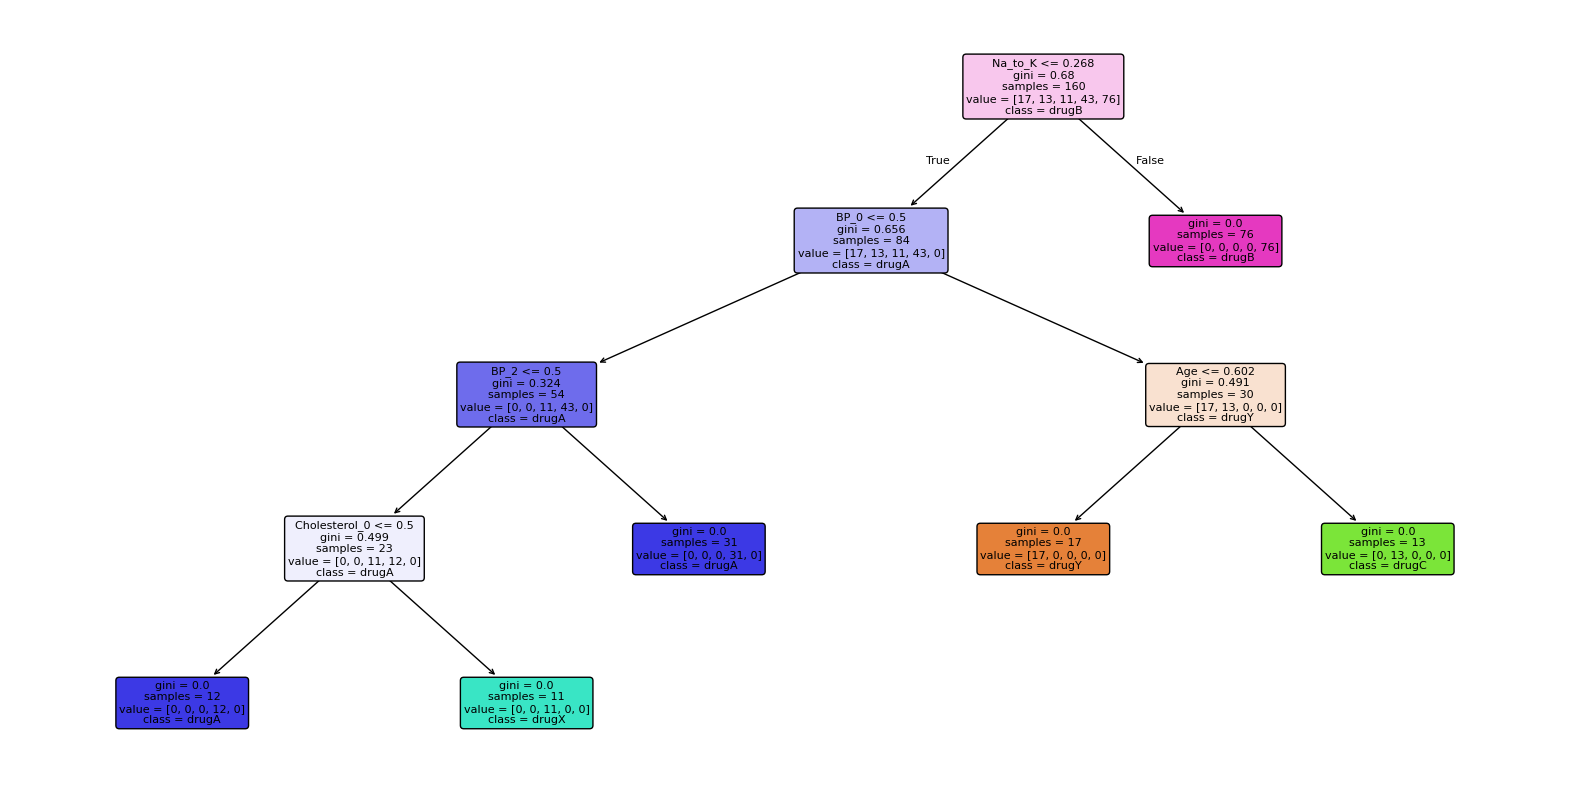

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data (ganti dengan path data Anda)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')

# 2. Pra-pemrosesan data (One-Hot Encoding)
# ... (kode One-Hot Encoding seperti di contoh sebelumnya) ...

# 3. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Tentukan model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# 5. Terapkan Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 untuk 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

# 6. Pruning dengan GridSearchCV
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]}  # Rentang nilai ccp_alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 7. Latih model terbaik
best_model.fit(X_train, y_train)

# 8. Evaluasi model pada data testing
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Testing Data: {accuracy}")
print(classification_report(y_test, y_pred))

# 9. Visualisasikan Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          class_names=data['Drug'].unique().astype(str),
          fontsize=8)
plt.show()

Setelah menerapkan **Cross-Validation** pada model, hasil yang didapatkan menunjukkan beberapa hal penting terkait kinerja dan validitas model:

- **Cross-Validation Scores**: Hasil dari cross-validation menunjukkan nilai akurasi yang sangat baik di hampir semua fold, dengan nilai [1.0, 1.0, 0.975, 0.925, 1.0]. Hal ini menunjukkan bahwa model bekerja sangat baik pada sebagian besar fold, tetapi ada sedikit penurunan kinerja pada fold keempat (0.925). Meskipun demikian, model tetap menunjukkan kinerja yang sangat baik secara keseluruhan.

- **Mean Accuracy**: Rata-rata akurasi dari hasil cross-validation adalah sekitar 98%, yang menunjukkan bahwa model memiliki kinerja yang sangat baik pada data pelatihan yang terbagi.

- **Accuracy on Testing Data**: Model memperoleh akurasi sempurna (1.0) pada data pengujian, yang menunjukkan bahwa model berhasil memprediksi semua data pengujian dengan benar.

Namun, meskipun hasil cross-validation menunjukkan kinerja yang sangat baik, **visualisasi decision tree** yang tetap sama dan masih menunjukkan pola **overfitting** perlu menjadi perhatian. Ini menunjukkan bahwa meskipun teknik cross-validation telah diterapkan untuk mengevaluasi kinerja model, **model masih mungkin menghafal data pelatihan terlalu baik**, dan tidak mampu digeneralisasi dengan baik ke data baru yang lebih beragam.

Secara keseluruhan, meskipun model menunjukkan akurasi yang sangat tinggi baik pada data pelatihan maupun pengujian, penting untuk mempertimbangkan beberapa langkah tambahan seperti **pruning** atau menggunakan **model yang lebih sederhana** untuk mencegah overfitting lebih lanjut dan memastikan model dapat lebih baik mengadaptasi data yang belum pernah dilihat sebelumnya.